[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kashmala.arif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kashmala.arif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kashmala.arif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kashmala.arif\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Customer Summary with Sentiment Categories:
   customer_id  feedback_sentiment sentiment_category
0    CUST00001            0.285950           Positive
1    CUST00002            0.566250           Negative
2    CUST00003            0.276875           Positive
3    CUST00004            0.308720           Positive
4    CUST00005           -0.476700           Negative
5    CUST00006            0.069500            Neutral
6    CUST00007            0.293233           Positive
7    CUST00008            0.533375           Positive
8    CUST00009            0.385325           Positive
9    CUST00010            0.244000           Positive
10   CUST00011            0.339533           Positive
11   CUST00012            0.047600            Neutral
12   CUST00013           -0.308900           Negative
13   CUST00014            0.320850           Positive
14   CUST00015            0.065750            Neutral
15   CUST00016           -0.018150            Neutral
16   CUST00017            0.095800    

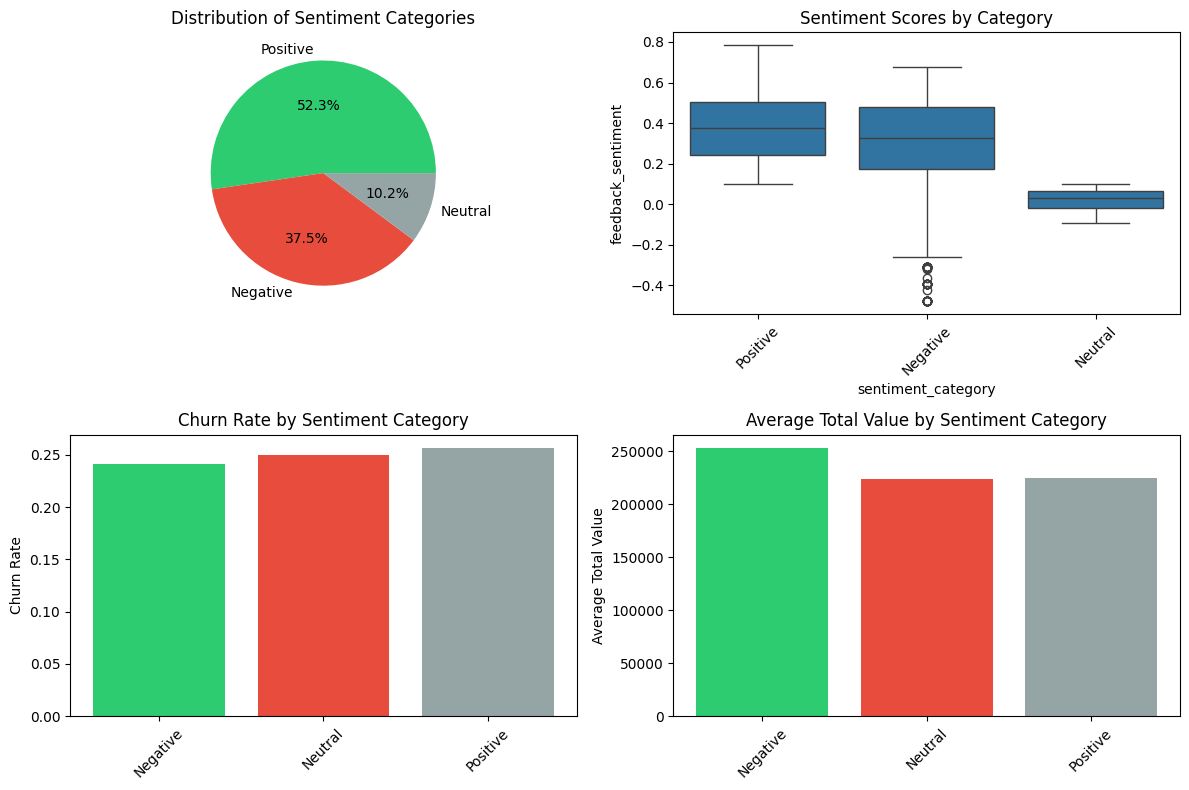

,customer_id,sale_id,total_value,price,product_id,category,age,tenure_months,churn,num_purchases,avg_quantity,feedback_sentiment,sentiment_category
0,CUST00001,2,249000,28500.000000,2,2,43,50,0,2,3.500000,0.285950,Positive
1,CUST00002,4,84300,8025.000000,4,3,22,37,1,4,2.750000,0.566250,Negative
2,CUST00003,4,130150,9512.500000,3,3,59,18,0,4,3.500000,0.276875,Positive
3,CUST00004,5,349000,33400.000000,4,2,29,3,0,5,2.400000,0.308720,Positive
4,CUST00005,1,8000,8000.000000,1,1,53,45,0,1,1.000000,-0.476700,Negative
5,CUST00006,5,176500,15220.000000,4,3,45,23,0,5,3.200000,0.069500,Neutral
6,CUST00007,3,450,66.666667,2,1,44,28,0,3,2.666667,0.293233,Positive
7,CUST00008,4,410200,30012.500000,3,2,28,22,1,4,3.750000,0.533375,Positive
8,CUST00009,4,234000,29250.000000,3,2,61,52,0,4,2.000000,0.385325,Positive
9,CUST00010,4,205500,28800.000000,3,2,36,15,1,4,2.250000,0.244000,Positive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv("../data/customer_cleaned.csv")

for c in ['sale_date', 'last_purchase_date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

# Preprocess feedback text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

df['feedback_clean'] = df['feedback_text'].apply(preprocess_text)

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    if text == "":
        return 0
    score = sia.polarity_scores(text)
    return score['compound']  # ranges from -1 (negative) to 1 (positive)

df['feedback_sentiment'] = df['feedback_clean'].apply(get_sentiment_score)

# Aggregate feedback per customer
customer_feedback = df.groupby('customer_id')['feedback_clean'].apply(lambda x: " ".join(x)).reset_index()

# Get original feedback text for rule-based detection
customer_feedback_original = df.groupby('customer_id')['feedback_text'].apply(lambda x: " ".join(x.fillna(""))).reset_index()
customer_feedback = customer_feedback.merge(customer_feedback_original, on='customer_id', how='left')

# Compute average sentiment per customer
customer_feedback['feedback_sentiment'] = df.groupby('customer_id')['feedback_sentiment'].mean().values

# Function to categorize sentiment with rule-based overrides
def categorize_sentiment(row):
    sentiment_score = row['feedback_sentiment']
    original_text = str(row['feedback_text']).lower()
    
    # Rule-based detection for specific negative phrases
    negative_phrases = [
        "delivery was late, not happy",
        "delivery late not happy",
        "late delivery",
        "not happy with delivery",
        "delayed delivery",
        "poor delivery",
        "terrible service",
        "worst experience",
        "never ordering again",
        "completely disappointed"
    ]
    
    # Check for explicit negative phrases
    for phrase in negative_phrases:
        if phrase in original_text:
            return "Negative"
    
    # Use sentiment score thresholds
    if sentiment_score > 0.1:
        return "Positive"
    elif sentiment_score < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment categorization
customer_feedback['sentiment_category'] = customer_feedback.apply(categorize_sentiment, axis=1)

# Numeric feature engineering
# --------------------------
customer_summary = df.groupby("customer_id").agg({
    "sale_id": "count",
    "total_value": "sum", 
    "price": "mean",
    "product_id": pd.Series.nunique,
    "category": pd.Series.nunique,
    "age": "last",
    "tenure_months": "last", 
    "churn": "first"
}).reset_index()

customer_summary['num_purchases'] = customer_summary["sale_id"]

avg_quantity = df.groupby("customer_id")["quantity"].mean()
customer_summary = customer_summary.merge(avg_quantity, on="customer_id", how="left")
customer_summary.rename(columns={"quantity": "avg_quantity"}, inplace=True)

# Merge text features including the new sentiment category
customer_summary = customer_summary.merge(
    customer_feedback[['customer_id', 'feedback_sentiment', 'sentiment_category']], 
    on='customer_id', 
    how='left'
)

customer_summary.fillna(0, inplace=True)

# Fill missing sentiment categories with "Neutral" for customers without feedback
customer_summary['sentiment_category'] = customer_summary['sentiment_category'].fillna("Neutral")

# Display results
print("Customer Summary with Sentiment Categories:")
print("="*50)
print(customer_summary[['customer_id', 'feedback_sentiment', 'sentiment_category']].head(20))

print("\nSentiment Category Distribution:")
print("="*35)
print(customer_summary['sentiment_category'].value_counts())

print("\nSample customers with different sentiment categories:")
print("="*55)
for category in ['Positive', 'Negative', 'Neutral']:
    sample = customer_summary[customer_summary['sentiment_category'] == category].head(3)
    if not sample.empty:
        print(f"\n{category} customers:")
        for idx, row in sample.iterrows():
            print(f"  Customer {row['customer_id']}: sentiment_score = {row['feedback_sentiment']:.3f}")

# Create visualization
plt.figure(figsize=(12, 8))

# Subplot 1: Sentiment category distribution
plt.subplot(2, 2, 1)
sentiment_counts = customer_summary['sentiment_category'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # Green, Red, Gray
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Sentiment Categories')

# Subplot 2: Sentiment scores by category
plt.subplot(2, 2, 2)
sns.boxplot(data=customer_summary, x='sentiment_category', y='feedback_sentiment')
plt.title('Sentiment Scores by Category')
plt.xticks(rotation=45)

# Subplot 3: Churn rate by sentiment category
plt.subplot(2, 2, 3)
churn_by_sentiment = customer_summary.groupby('sentiment_category')['churn'].mean()
plt.bar(churn_by_sentiment.index, churn_by_sentiment.values, color=colors)
plt.title('Churn Rate by Sentiment Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)

# Subplot 4: Average total value by sentiment category
plt.subplot(2, 2, 4)
value_by_sentiment = customer_summary.groupby('sentiment_category')['total_value'].mean()
plt.bar(value_by_sentiment.index, value_by_sentiment.values, color=colors)
plt.title('Average Total Value by Sentiment Category')
plt.ylabel('Average Total Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

customer_summary.head(30)

In [ ]:
import pickle
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

class NLTKSentimentModel:
    def __init__(self, negative_phrases=None):
        self.stop_words = set(stopwords.words("english"))
        self.lemmatizer = WordNetLemmatizer()
        self.sia = SentimentIntensityAnalyzer()
        self.negative_phrases = negative_phrases or [
            "delivery was late, not happy",
            "delivery late not happy",
            "late delivery",
            "not happy with delivery",
            "delayed delivery",
            "poor delivery",
            "terrible service",
            "worst experience",
            "never ordering again",
            "completely disappointed"
        ]

    def preprocess_text(self, text):
        if pd.isna(text) or not text:
            return ""
        tokens = word_tokenize(text.lower())
        tokens = [self.lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in self.stop_words]
        return " ".join(tokens)

    def get_sentiment_score(self, text):
        if not text:
            return 0.0
        return self.sia.polarity_scores(text)["compound"]

    def categorize_sentiment(self, text, score):
        text_lower = str(text).lower()
        for phrase in self.negative_phrases:
            if phrase in text_lower:
                return "Negative"
        if score > 0.1:
            return "Positive"
        elif score < -0.1:
            return "Negative"
        return "Neutral"

    def predict(self, texts):
        """
        Accept a single string or a list of strings.
        Returns list of dicts with score + category.
        """
        if isinstance(texts, str):
            texts = [texts]
        results = []
        for t in texts:
            cleaned = self.preprocess_text(t)
            score = self.get_sentiment_score(cleaned)
            category = self.categorize_sentiment(t, score)
            results.append({
                "text": t,
                "cleaned": cleaned,
                "score": score,
                "category": category
            })
        return results

# Instantiate and save
sentiment_model = NLTKSentimentModel()

with open("../models/sentiment_model.pkl", "wb") as f:
    pickle.dump(sentiment_model, f)

print("✅ Sentiment model saved to '../models/sentiment_model.pkl'")


✅ Sentiment model saved to '../models/sentiment_model.pkl'
